# **The Best Neighborhood in Pittsburgh for Community-Based Fun**

## Introduction
For our project, we wanted to determine the best neighborhood in Pittsburgh by using our custom metrics. For our metric, we wanted to look at the best neighborhood for community-based fun. When thinking about what our metric should be, we decided that a neighborhood that involves community members with fun events was the most important to feel like home. Our approach was for each of us to look through each of the WPRDC data sets and then collaborate to choose which datasets seemed like the most fit for this metric. Some alternatives included best neighborhood for public safety, best neighborhoods for greenery, and best neighborhoods for less traffic.

### The Metric
To find our metrics for best neighborhood in Pittsburgh for community-based fun, we considered community engagement, access to green spaces, and fun cultural events. The datasets that we analyzed to come to a conclusion about our metric were the amount of block parties, playing fields, and fish-fry locations and their overall accessibility to the people of Pittsburgh. Overall, our group decided that the metric that makes a neighborhood "the best" is how many opportunities there are for community-based fun.

- **Block Parties (Gina):** This data set shows all block party requests submitted to the Department of Public Works in 2013-2014. Each record includes the date, address, and applicant information.
  

   Permit No.  Division Event Date            Address            From  \
0  DPW1400991       1.0  3/15/2014    862 PROGRESS ST   CARPENTER WAY   
1  DPW1301434       1.0  3/16/2013    862 PROGRESS ST   CARPENTER WAY   
2  DPW1400964       2.0  3/17/2014  112 N PACIFIC AVE        PENN AVE   
3  DPW1308521       2.0  3/29/2014      7219 KELLY ST    HOMEWOOD AVE   
4  DPW1301929       3.0  3/31/2013   4919 GERTRUDE ST  FLOWERS AVENUE   
5  DPW1401522       1.0   4/5/2014   2334 MANNHEIM ST          ATMORE   
6  DPW1302018       2.0   4/6/2013       0 DAVISON ST     STANTON AVE   
7  DPW1401712       3.0  4/12/2014  5110 CHAPLAIN WAY  W ELIZABETH ST   
8  DPW1401252       3.0  4/12/2014   5615 WILKINS AVE     WIGHTMAN ST   
9  DPW1302006       2.0  4/19/2013    5330 KINCAID ST         N AIKEN   

             To  
0   PROGRESS ST  
1   PROGRESS ST  
2   DEARBORN ST  
3   STERRETT ST  
4   GLEN CALADH  
5       MC COOK  
6       52ND ST  
7  COURTLAND ST  
8  S NEGLEY AVE  
9    N ATLANTIC 

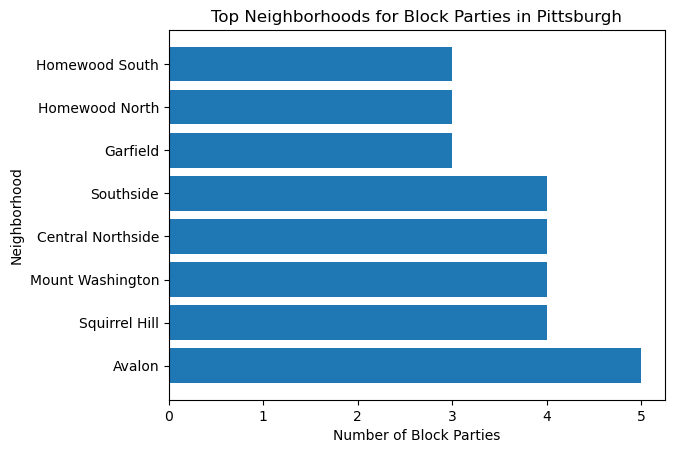

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#loading the dataset
block_party_data = pd.read_csv('block-party.csv') 

#showing the first 10 rows of the data 
print(block_party_data.head(10))

#creating an empty dictionary to count block parties by address
address_counts = {}

#looping through each address in the dataset
for address in block_party_data['Address']:
    if address in address_counts:
        address_counts[address] += 1  #increment the count if address is already in dictionary
    else:
        address_counts[address] = 1  #initialize the count to 1 if address is new

#find the top 10 addresses
top_addresses = []  #list for top 10 addresses
top_counts = []     #list for the counts of the top 10 addresses

for i in range(10):  #loop runs 10 times
    max_count = 0 #initialize max_count to 0
    max_address = None #intialize max_address to none
    
    #find the address with the highest count that hasn't been added yet
    for address, count in address_counts.items():
        #if the count is higher than the max count and the address is not in the list already
        if count > max_count and address not in top_addresses:
            max_count = count
            max_address = address
    
    #adding the top addresses and its count to the lists
    top_addresses.append(max_address)
    top_counts.append(max_count)

#converting the top 10 addresses to the corresponding neighborhoods
top_neighborhoods = []
for address in top_addresses:
    if address == "1 CALIFORNIA AVE":
        top_neighborhoods.append("Avalon")
    elif address == "0 MONTEREY ST":
        top_neighborhoods.append("Central Northside")
    elif address == "7120 KELLY ST":
        top_neighborhoods.append("Homewood South")
    elif address == "7151 MOUNT VERNON ST":
        top_neighborhoods.append("Homewood North")
    elif address == "5330 KINCAID ST":
        top_neighborhoods.append("Garfield")
    elif address == "0 CAREY WAY":
        top_neighborhoods.append("Southside")
    elif address == "1240 RESACA PL":
        top_neighborhoods.append("Central Northside")
    elif address == "508 GRACE ST":
        top_neighborhoods.append("Mount Washington")
    elif address == "5510 DARLINGTON RD":
        top_neighborhoods.append("Squirrel Hill")
    elif address == "1214 BENNINGTON AVE":
        top_neighborhoods.append("Squirrel Hill")
    else:
        top_neighborhoods.append("Unknown")  #default case

#plotting neighborhoods
plt.barh(top_neighborhoods, top_counts)
plt.xlabel('Number of Block Parties')
plt.ylabel('Neighborhood')
plt.title('Top Neighborhoods for Block Parties in Pittsburgh')
plt.show()

- **Playing Fields (Sydney):** Local sports playing fields in the Pittsburgh region. Data is collected from parks, neighborhoods, types of playing fields, field usage, and components of the field.

                     field_usage
neighborhood                    
Brighton Heights               7
South Side Slopes              6
Brookline                      6
Squirrel Hill South            5
Carrick                        5
Highland Park                  4
Hazelwood                      4
Mount Washington               4
Lower Lawrenceville            4
Beltzhoover                    3
Sheraden                       3
Shadyside                      3
Beechview                      3
Troy Hill                      3
Morningside                    3


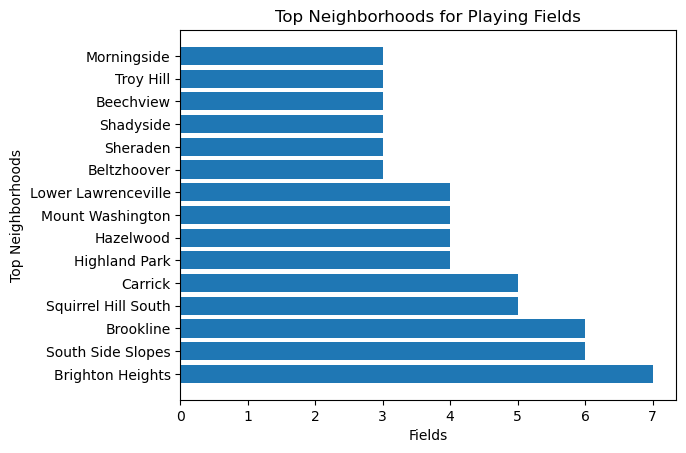

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


#loading the data set
pgh_playing_fields = pd.read_csv("playing-pgh-fields.csv", )


pgh_playing_fields.head()
field = pgh_playing_fields[['neighborhood','field_usage']]
field.head(15)
field_p = field.groupby("neighborhood").count()
field_sorted = field_p.sort_values(by='field_usage',ascending=False)

top_15_neighborhoods = field_sorted.head(15)


print(top_15_neighborhoods)


field_counts = field.groupby('neighborhood') ['field_usage'].count()
top_15_field_counts = field_counts.sort_values(ascending=False).head(15)

plt.barh(top_15_field_counts.index, top_15_field_counts.values )
plt.xlabel('Fields')
plt.ylabel('Top Neighborhoods')
plt.title('Top Neighborhoods for Playing Fields')
plt.show()

- **Fish Fry Locations (Gabby):** Lenten Fish Fry records for the Greater Pittsburgh region. Data is collected before and during the Lenten fish fry season each year by Code for Pittsburgh. Data is sourced from news outlets, social media, and public requests.

In [60]:
# load pandas
import pandas as pd
import csv


# load data
fish = pd.read_csv("fishy.csv", index_col="_id") # use the column named _id as the row index

pitt_fish = fish[fish['venue_address'].str.contains("Pittsburgh", case=False)] #if its in pittsburgh put it in pitt_fish

pitt_fish.head(45)

,validated,venue_name,venue_type,venue_address,website,events,etc,menu,venue_notes,phone,email,homemade_pierogies,take_out,alcohol,lunch,handicap,publish,id,latitude,longitude
_id,,,,,,,,,,,,,,,,,,,,
1,True,Sacred Heart Parish,Church,"310 Shady Avenue, Pittsburgh, PA 15206",http://www.sacredheartparishshadyside.org/Fish...,"Friday Mar 10 from 5:00 PM to 7:30 PM, Friday ...",Fridays of Lent (except Good Friday) 5-7:30,see website,NaN,412-361-3131,NaN,NaN,True,NaN,NaN,NaN,True,282,40.456095,-79.923314
9,False,Robert Wholey & Co Inc,NaN,"1711 Penn Avenue, Pittsburgh, PA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,99,40.450032,-79.985990
10,True,Most Holy Name,Unsure / N/A,"1515 Tinsbury Street, Pittsburgh, PA",https://www.mostholynameofjesusparish15212.org/,"Friday Mar 10 from 4:00 AM to 7:00 PM, Friday ...",NaN,https://www.mostholynameofjesusparish15212.org...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,283,40.464242,-79.983391
23,True,"St. Teresa of Avila, Perrysville",Church,"1000 Avila Court Pittsburgh, PA 15237",http://avilaparish.org/lenten-fish-fry/,"Friday Mar 10 from 4:30 PM to 7:30 PM, Friday ...",NaN,"Fried Fish, Baked Fish, Fried Shrimp, Fish San...",NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,True,47,40.539051,-80.039719
26,True,Nied's Hotel,Restaurant,"5438 Butler St, Pittsburgh, PA 15201",http://niedshotel.myfastsite.com/,"Friday Mar 24 from 7:00 AM to 11:45 PM, Friday...",famous fish sandwich,http://niedshotel.myfastsite.com/menu/,NaN,412-781-9853,NaN,NaN,True,True,True,NaN,True,163,40.483363,-79.949836
28,False,Harris Grill,Restaurant,"5747 Ellsworth, Pittsburgh, PA",http://harrisgrill.com/,NaN,No info for this year.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,62,40.455965,-79.931308
29,True,"St. Stephen, Hazelwood",Church,"134 East Elizabeth St. Pittsburgh, PA",http://www.ststephen-hazelwood.org/,"Friday Mar 31 from 3:30 PM to 7:00 PM, Friday ...",NaN,Baked and fried fish dinners include french fr...,NaN,412-421-9210 office 412-421-4748 takeout orders,NaN,NaN,True,False,False,True,True,46,40.407194,-79.942663
40,False,Brown Chapel AME Church,Church,"1400 Boyle St. Pittsburgh, PA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,170,40.457463,-80.006315
51,True,Kretzler's Tavern,Restaurant,"2240 Babcock Blvd., Pittsburgh, Pennsylvania",http://www.kretzlerstavern.com/,NaN,NaN,famous fish sandwich,NaN,NaN,NaN,NaN,NaN,True,True,NaN,True,286,40.512522,-79.997174


{nan: 1, 'Shadyside': 2, 'Strip District': 1, 'Troy Hill': 1, 'McKnight': 1, 'Stanton Heights': 1, 'Hazelwood': 1, 'Fineview': 1, 'North Hills': 1, 'Munhall': 1, 'Downtown Pittsburgh': 2, 'Swissvale': 1, 'Willock': 1, 'Greenfield': 1, 'Bruceton': 1, 'North Oakland': 1, 'East Allegheny': 2, 'New Homestead ': 1, 'South Side Flats': 7, 'Elliot': 1, 'Brighton Heights': 1, 'Wind Gap': 1, 'Morningside': 2, 'Wilkins Township': 1, 'Blawnox': 1, 'Avonworth': 1, 'Carrick': 2, 'Mount Washington': 2, 'Brentwood': 1, 'East Pittsburgh': 1, 'Mount Lebanon': 1, 'Bloomfield': 1, 'Ross Township': 1, 'Polish Hill': 1}
['Shadyside', 'Downtown Pittsburgh', 'East Allegheny', 'South Side Flats', 'Morningside', 'Carrick', 'Mount Washington']


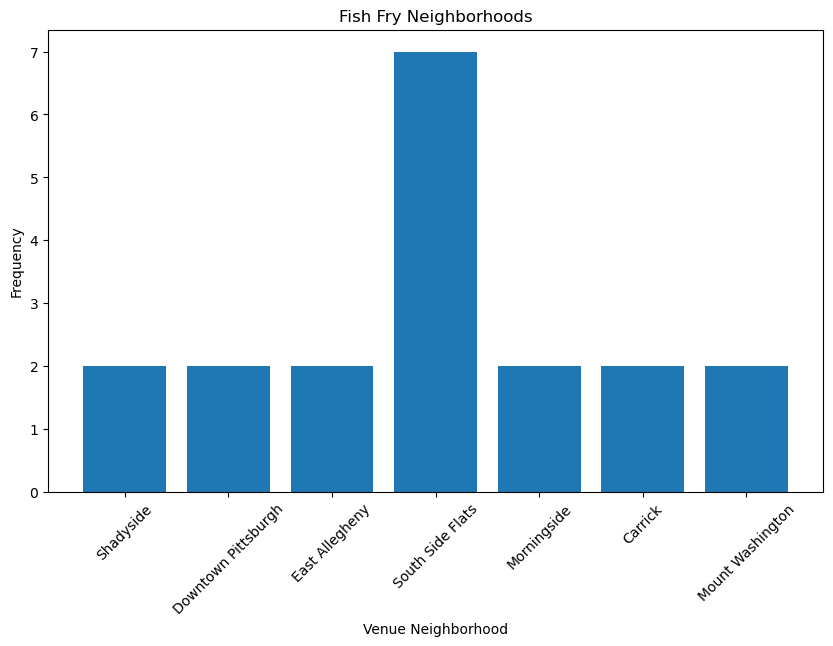

In [62]:
#import everything needed
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#define counting method
def count_repeat_neighborhoods(df, venue_neighborhood):
   
    word_counts = {} #initialize count dictionary
    for value in df[venue_neighborhood]:
        
            if value in word_counts: #counts repeat neigborhoods
                word_counts[value] += 1
            else:
                word_counts[value] = 1

    return word_counts

df = pd.read_csv('pitt_fish.csv')
word_counts = count_repeat_neighborhoods(df, 'venue_neighborhood') #calls the counting method
print(word_counts)

# Initialize a list to store neighborhoods that appear more than once
repeated_neighborhoods = []

# Loop through word counts and collect neighborhoods that repeat
for word, count in word_counts.items():
    if count > 1:  
        repeated_neighborhoods.append(word)  # Add the word to the list of repeated words

# Print the repeated values
print(repeated_neighborhoods)

# Create a new dictionary with repeated values and their counts
repeated_neighborhood_counts = {word: word_counts[word] for word in repeated_neighborhoods}

# Plotting graph
plt.figure(figsize=(10, 6))
plt.bar(repeated_neighborhood_counts.keys(), repeated_neighborhood_counts.values())
plt.xlabel('Venue Neighborhood')
plt.ylabel('Frequency')
plt.title('Fish Fry Neighborhoods')
plt.xticks(rotation=45)
plt.show()

 ### Data for Best Neighborhood in Pittsburgh for Community-Based Fun

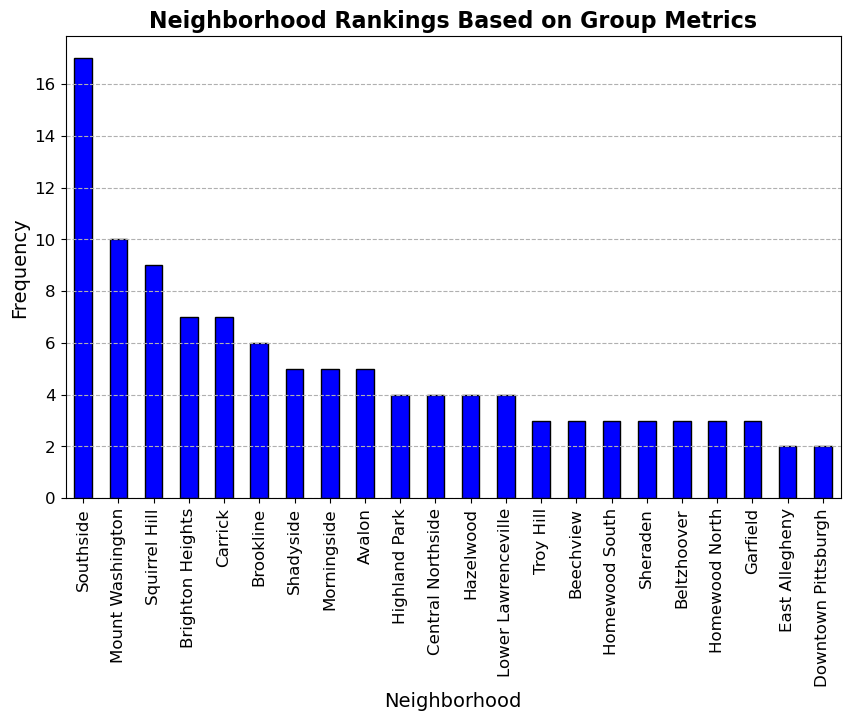

Neighborhood
Southside              17
Mount Washington       10
Squirrel Hill           9
Brighton Heights        7
Carrick                 7
Brookline               6
Shadyside               5
Morningside             5
Avalon                  5
Highland Park           4
Central Northside       4
Hazelwood               4
Lower Lawrenceville     4
Troy Hill               3
Beechview               3
Homewood South          3
Sheraden                3
Beltzhoover             3
Homewood North          3
Garfield                3
East Allegheny          2
Downtown Pittsburgh     2
Name: count, dtype: int64


In [65]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'final_neighborhoods.csv' 
neighborhood_data = pd.read_csv(file_path)

#counting the occurences of each neighborhood
neighborhood_counts = neighborhood_data['Neighborhood'].value_counts()

#creating a bar chart for the neighborhoods
plt.figure(figsize=(10, 6))
neighborhood_counts.plot(kind='bar', color='blue', edgecolor='black')

#making the graph
plt.title('Neighborhood Rankings Based on Group Metrics', fontsize=16, fontweight='bold')
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()
#displaying the counts for the neighborhoods as reference
print(neighborhood_counts)

## Narrative
Based on the analysis of our datasets and submetrics, we decided that the best neighborhood to live in in the city of Pittsburgh is Southside. We found that this neighborhood is the most accessible for community based fun in Pittsburgh, whether that be with the number of playing fields, block parties, or fish fry locations. This means that community members of all ages can be involved in their community and connect with others in Pittsburgh through these events, which is great for people who are just moving to Pittsburgh or just looking for fun events to attend. This is the data that we collected that shows and proves our results. 

### Conclusion
 -**Gina:** Based on the analysis of my dataset, I found that Avalon was the best neighborhood for community-based fun since it had the most reports of block parties there. These findings were different than my personal favorite neighborhood, which is Shadyside. I loved exploring Shadyside and all of the different shops, but since it is more of a shopping area, there are less incidents of block parties. Although Shadyside contains many different shops and cafes for community-based fun, it was interesting to see how many more block parties there were in Avalon, which is more centered on exploring your community through fun events.
 
 -**Sydney:** The neighborhood for my dataset that participates in the most playing fields is Brighton Heights. The significance of this data highlights not only the physical engagement of the community but also the role that recreational spaces play in fostering social connections and strengthening community bonds. The participation in Brighton Heights' playing fields signifies more than just an interest in sports but the neighborhood's commitment to community-building, social well-being, and the creation of spaces where lasting connections can form. This kind of engagement not only improves the quality of life for residents but also contributes to the long-term sustainability of the community itself.
 
 -**Gabby:** The data that I used referred to Fish Fry's across Western Pennsylvania. This dataset was included as evidence to support our claim becuase Fish Fry's are community events that bolster unity within any given place, similarly with other community events. While they are associated with Christianity, they are open to the public. So this dataset was used to measure which community had the most opportunity for engagement already in place. I initially had my dataset with locations across western Pennsylvania so I then iterated through the dataset to find the Pittsburgh data points and created a new csv file with that information. I then iterated through that new list to find the counts for each neighborhood. With the counts of fish fry's per neighborhood, I took the neighborhoods with more than one fish fry in them and put them into a graph to visually compare them. While the graph was helpful, the outlier was clearly South Side Flats, as there are 5 more fish fry's than any other neighborhood in the dataset.